# Perceptron
* It is an algorithm as well as a mathematical function.
* Building block of deep learning.
* Binary classifier.
* Used of linearly separable data.

In [1]:
# Libraries uses
from sklearn.linear_model import Perceptron
from mlxtend.plotting import plot_decision_regions

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
iris_labels = {"setosa": 1, "versicolor": 0, "virginica": 0}

In [3]:
iris = sns.load_dataset("iris")
iris.species = iris.species.map(iris_labels)
new_iris = iris.drop(columns=["sepal_length", "sepal_width"], axis=1)
new_iris.head()

,petal_length,petal_width,species
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1


<Axes: xlabel='petal_length', ylabel='petal_width'>

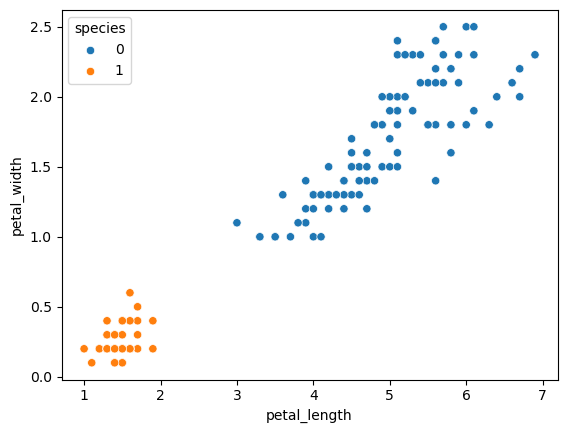

In [4]:
sns.scatterplot(data=new_iris, x="petal_length", y="petal_width", hue="species")

We can see that the above data is linearly separable. Let's create a perceptron to differentiate between these classes.

In [5]:
def perceptron(X, y, lr=1, epochs=1000):
    def step_function(z):
        return 1 if z > 0 else 0

    X = np.insert(X, 0, 1, axis=1)
    rows, columns = X.shape
    weights = np.ones(columns)

    for _ in range(epochs):
        j = np.random.randint(0, rows)
        X_j = X[j]
        y_hat = step_function(np.dot(X_j, weights))
        weights += lr * (y[j] - y_hat) * X_j

    return weights[0], weights[1:]

In [6]:
X = new_iris.iloc[:, :-1]
y = new_iris.iloc[:, -1]
bias, weights = perceptron(X, y, lr=1, epochs=10000)
print(bias, weights)

4.0 [-1.5 -1. ]


In [7]:
m = -(weights[0] / weights[1])
b = -(bias / weights[1])
x_input = np.linspace(-3, 7, 250)
y_input = m * x_input + b

(-1.0, 3.0)

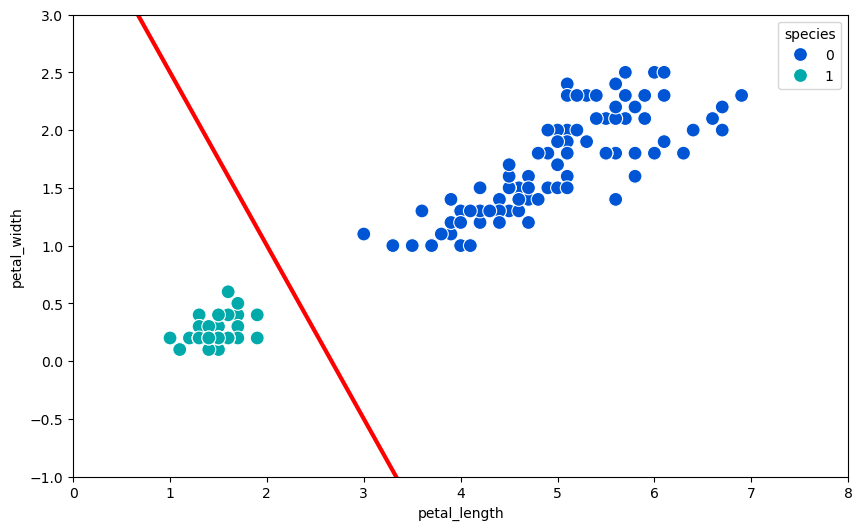

In [8]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=x_input, y=y_input, color="red", linewidth=3)
sns.scatterplot(
    data=new_iris,
    x="petal_length",
    y="petal_width",
    hue="species",
    palette="winter",
    s=100,
    legend=True,
)
plt.xlim(0, 8)
plt.ylim(-1, 3)

The above line represents a perceptron dividing the dataset. This is a simple perceptron which uses a step function as an activation function. This function works well for linearly separable data but for non-linear data we need another function which can separate it like sigmoid, ReLu, tanh, etc. Now let's use the perceptron class of scikit-learn.

In [9]:
p = Perceptron()
p.fit(X, y)

Perceptron()

In [10]:
print(p.coef_)
print(p.intercept_)

[[-0.7 -1.2]]
[2.]


/home/anish/anaconda3/envs/mobcoder_env/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


<Axes: >

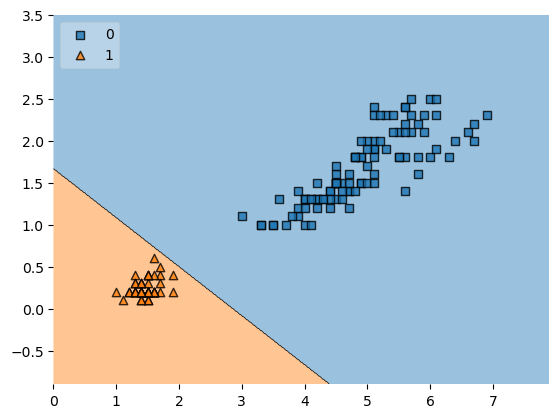

In [11]:
plot_decision_regions(X.values, y.values, clf=p, legend=2)

This classification is done by our perceptron class. Now let's use gradient descent technique to minimize the loss.

In [12]:
def perceptron_gd(X, y, lr=1, epochs=1000):
    rows, columns = X.shape
    weights = np.ones(columns + 1)

    for _ in range(epochs):
        for i in range(rows):
            z = weights[1] * X[i][0] + weights[2] * X[i][1] + weights[0]

            if z * y[i] < 0:
                weights[1] += lr * y[i] * X[i][0]
                weights[2] += lr * y[i] * X[i][1]
                weights[0] += lr * y[i]

    return weights[0], weights[1:]

In [13]:
y_mod = y.map({0: -1, 1: 1})
bias, weights = perceptron_gd(X.values, y_mod.values, 0.5, 10000)
print(bias, weights)

2.0 [-7.50000000e-01  5.55111512e-17]


In [14]:
m = -(weights[0] / weights[1])
b = -(bias / weights[1])
x_input = np.linspace(-3, 7, 250)
y_input = m * x_input + b

(-1.0, 3.0)

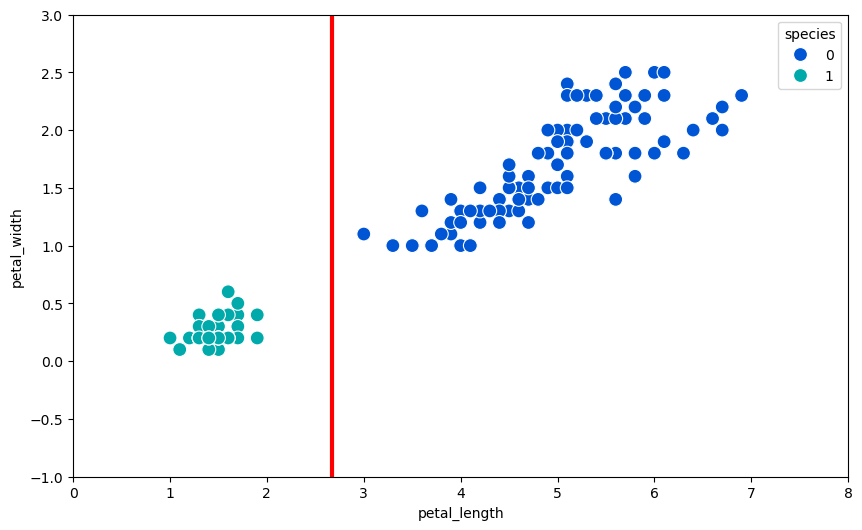

In [15]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=x_input, y=y_input, color="red", linewidth=3)
sns.scatterplot(
    data=new_iris,
    x="petal_length",
    y="petal_width",
    hue="species",
    palette="winter",
    s=100,
    legend=True,
)
plt.xlim(0, 8)
plt.ylim(-1, 3)

The above is classified by minimizing loss function using gradient descent.